In [21]:
from sklearn.datasets import load_iris
from sklearn import preprocessing

iris = load_iris()
x = iris.data
y = iris.target
normalized_x = preprocessing.normalize(x)
print(normalized_x)


[[0.80377277 0.55160877 0.22064351 0.0315205 ]
 [0.82813287 0.50702013 0.23660939 0.03380134]
 [0.80533308 0.54831188 0.2227517  0.03426949]
 [0.80003025 0.53915082 0.26087943 0.03478392]
 [0.790965   0.5694948  0.2214702  0.0316386 ]
 [0.78417499 0.5663486  0.2468699  0.05808704]
 [0.78010936 0.57660257 0.23742459 0.0508767 ]
 [0.80218492 0.54548574 0.24065548 0.0320874 ]
 [0.80642366 0.5315065  0.25658935 0.03665562]
 [0.81803119 0.51752994 0.25041771 0.01669451]
 [0.80373519 0.55070744 0.22325977 0.02976797]
 [0.786991   0.55745196 0.26233033 0.03279129]
 [0.82307218 0.51442011 0.24006272 0.01714734]
 [0.8025126  0.55989251 0.20529392 0.01866308]
 [0.81120865 0.55945424 0.16783627 0.02797271]
 [0.77381111 0.59732787 0.2036345  0.05430253]
 [0.79428944 0.57365349 0.19121783 0.05883625]
 [0.80327412 0.55126656 0.22050662 0.04725142]
 [0.8068282  0.53788547 0.24063297 0.04246464]
 [0.77964883 0.58091482 0.22930848 0.0458617 ]
 [0.8173379  0.51462016 0.25731008 0.03027177]
 [0.78591858 

In [22]:
import kagglehub

## Download latest version
path = kagglehub.dataset_download("neurocipher/heartdisease")
print(path)

C:\Users\anshu\.cache\kagglehub\datasets\neurocipher\heartdisease\versions\1


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import shapiro
base = pd.read_csv(f'{path}/Heart_Disease_Prediction.csv')
base.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [24]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [25]:
base.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


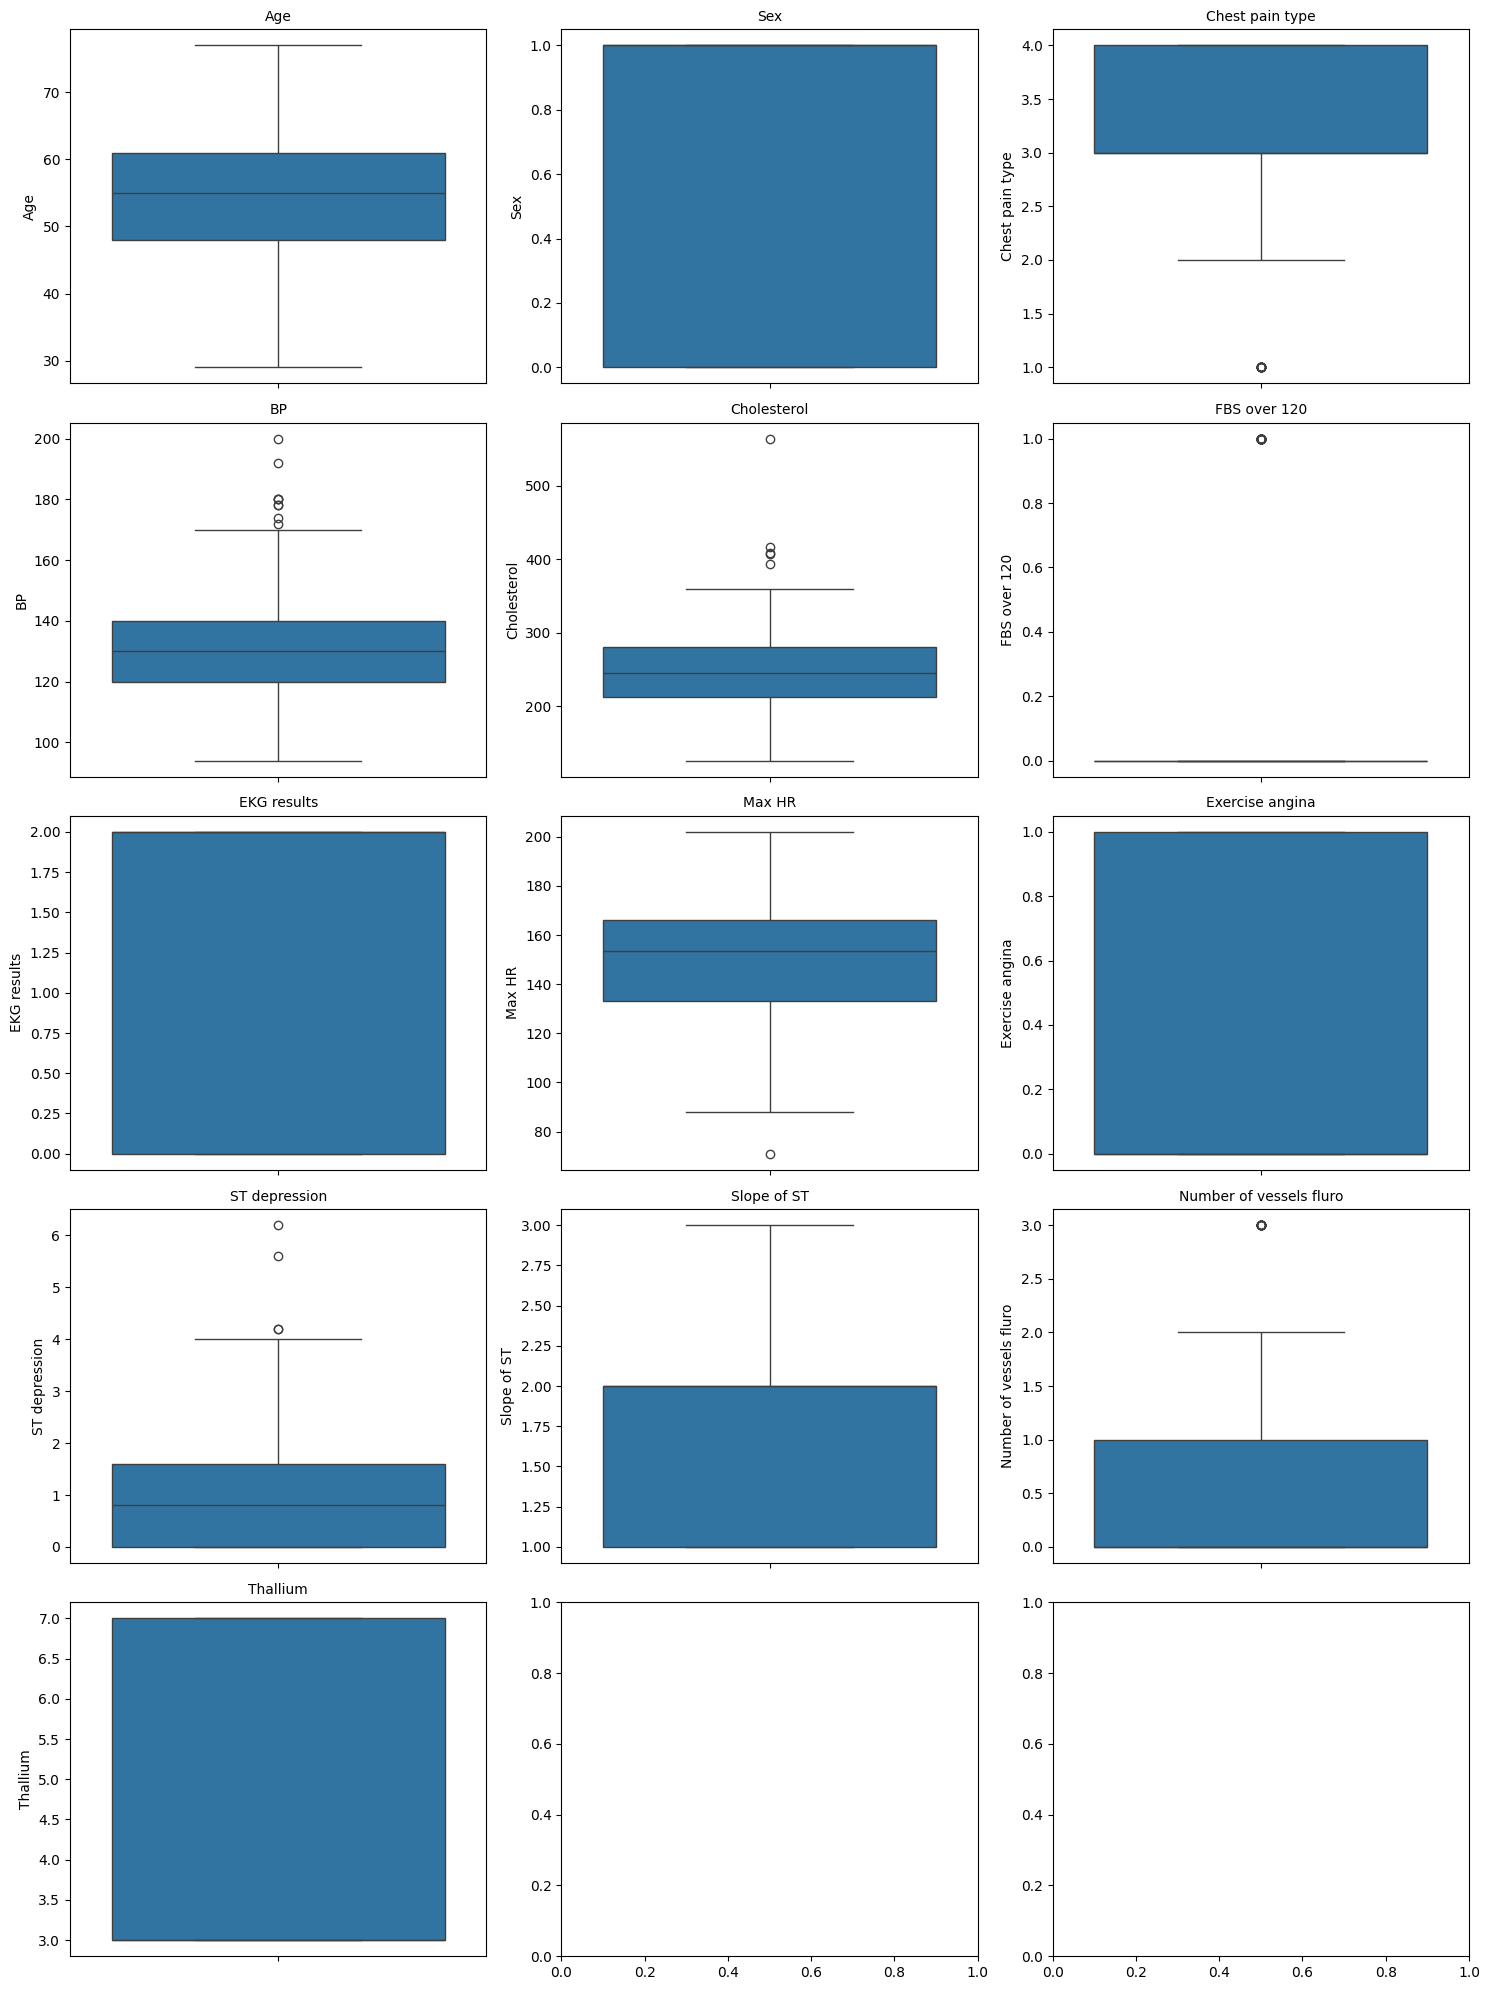

In [26]:
cols = len(base.columns)
cols_per_row = 3
rows = math.ceil(cols / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, rows*4))
axes = axes.flatten()

for i, col in enumerate(base.columns):
    if base[col].dtype != object:
        sns.boxplot(ax=axes[i], data=base[col])
        axes[i].set_title(col, fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [27]:
base.isna().sum(), base.isnull().sum()

(Age                        0
 Sex                        0
 Chest pain type            0
 BP                         0
 Cholesterol                0
 FBS over 120               0
 EKG results                0
 Max HR                     0
 Exercise angina            0
 ST depression              0
 Slope of ST                0
 Number of vessels fluro    0
 Thallium                   0
 Heart Disease              0
 dtype: int64,
 Age                        0
 Sex                        0
 Chest pain type            0
 BP                         0
 Cholesterol                0
 FBS over 120               0
 EKG results                0
 Max HR                     0
 Exercise angina            0
 ST depression              0
 Slope of ST                0
 Number of vessels fluro    0
 Thallium                   0
 Heart Disease              0
 dtype: int64)

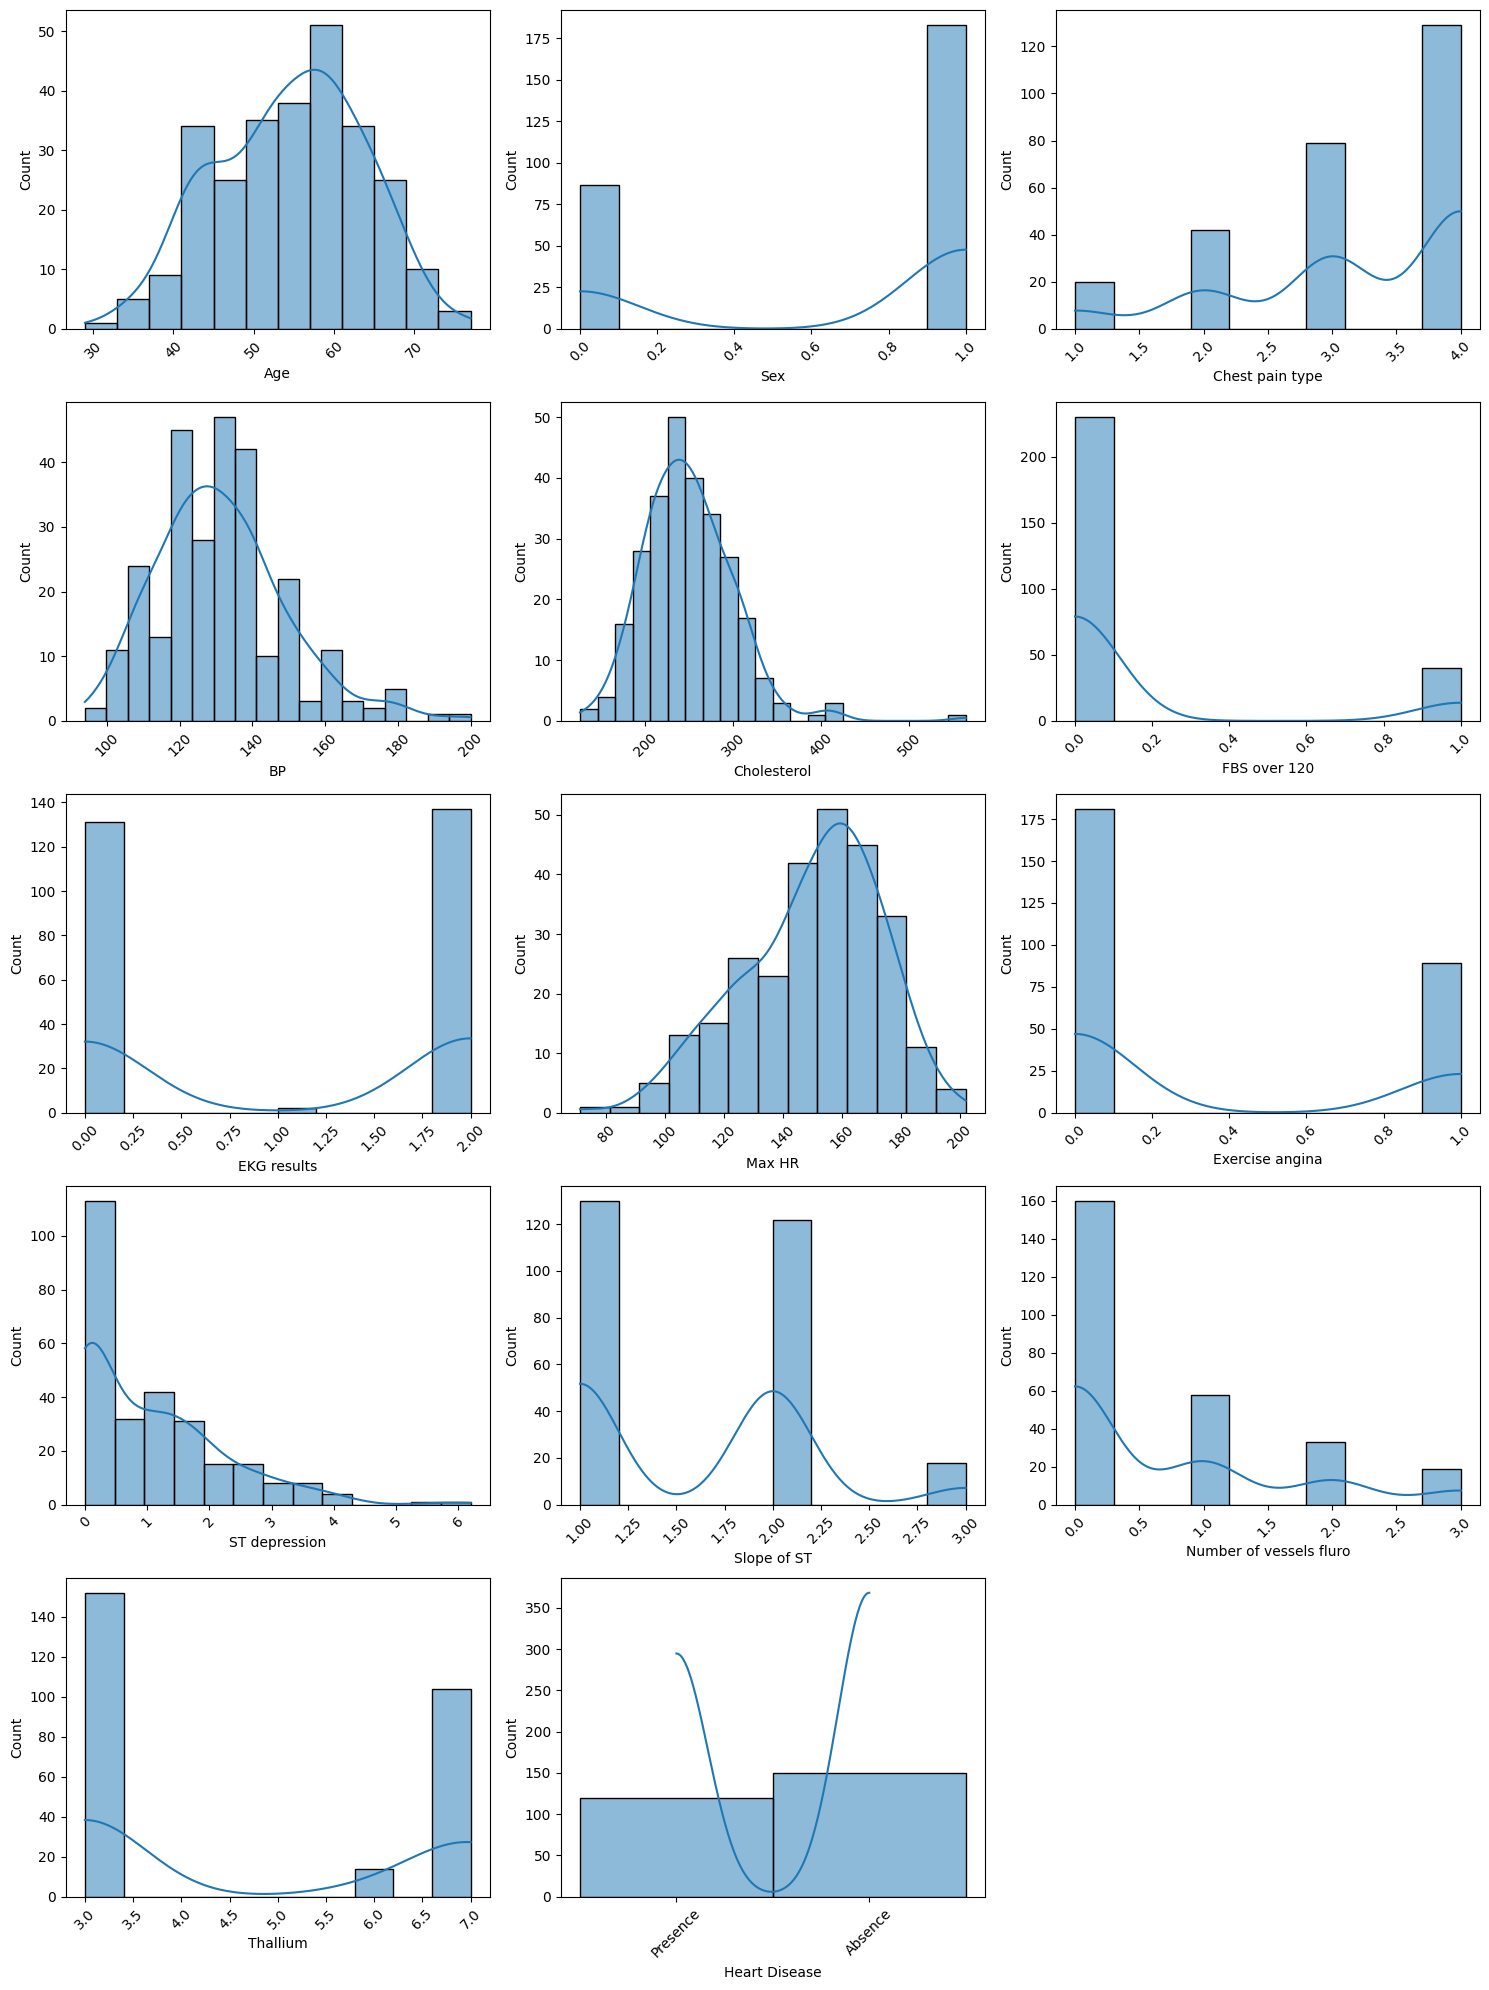

In [28]:
cols = len(base.columns)
cols_per_row = 3
rows = math.ceil(cols / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, rows*4))
axes = axes.flatten()

for i, col in enumerate(base.columns):
    sns.histplot(ax=axes[i], data=base[col], kde=True)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [30]:
from sklearn.ensemble import RandomForestClassifier

def custom_print(title, acc, err, conf, score):
    ##print(f'{'-'*10} {title}{'-'*10}\nAcc rate: {acc}\nErr rate: {err}\nConfusion matrix: \n{conf}')
    print(f'{'-'*10} {title}{'-'*10}\nAcc rate: {acc}\nErr rate: {err}\nConfusion matrix: \n{conf}')
    print(f'Mean acc: {score.mean{}:.2f}')
    print(f'CI (STD): +/- {score.std{}:.4f}\n')

print(f'\n\n{'-'*10} Comparison between 3 different classification models {'-'*10}\n\n')
custom_print('Decision Tree', tree_acc_rate, tree_err_rate, tree_confusion, tree_score)

## Random Forest
## project summary?
forest_model = RandomForestClassifier(random_state=42)
forest_grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid, cv=10, scoring = 'accuracy')
forest_grid_search.fit(X_train, Y_train)

best_forest_model = forest_grid_search.best_estimator_
forest_preds = best_forest_model.predict(X_test)



SyntaxError: invalid syntax. Perhaps you forgot a comma? (1044452943.py, line 6)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Train Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, Y_train)

# Predictions
tree_preds = tree_model.predict(X_test)

# Metrics
tree_acc_rate = accuracy_score(Y_test, tree_preds)
tree_err_rate = 1 - tree_acc_rate
tree_confusion = confusion_matrix(Y_test, tree_preds)
tree_score = cross_val_score(tree_model, X_train, Y_train, cv=10)

# Print results
custom_print(
    'Decision Tree',
    tree_acc_rate,
    tree_err_rate,
    tree_confusion,
    tree_score
)


NameError: name 'X_train' is not defined